# Immigration Data Analysis and Predictive Modeling

This notebook provides an analysis of OECD immigration data from 2000 to 2021. The data was acquired from Kaggle: https://www.kaggle.com/datasets/mexwell/international-migration-database/data

It includes:

- **Data Exploration:** Load the dataset, view summary statistics, and inspect the data structure.
- **Visualization:** Plot global immigration trends over time.
- **Predictive Modeling:** Build a simple linear regression model to forecast future immigration numbers based on the country, year, and type of immigration (e.g., for the year 2025).


In [1]:
pip install itables

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.3 MB/s eta 0:00:00


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from itables import init_notebook_mode, show
from IPython.display import display, clear_output
import ipywidgets as widgets

# Load the dataset
df = pd.read_csv('data/MIG_01032024110110429.csv')
df = df[(df['Year'] >= 2000) & (df['Year'] <= 2021)]

# Display the first few rows to understand its structure
print("Data Head:")
print(df.head())

# Check columns and data types
print("\nData Info:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

<ipython-input-5-645f9150df2c>:10: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MIG_01032024110110429.csv')


Data Head:
   CO2 Country of birth/nationality  VAR  \
1  AFG                  Afghanistan  B11   
2  AFG                  Afghanistan  B11   
3  AFG                  Afghanistan  B11   
4  AFG                  Afghanistan  B11   
5  AFG                  Afghanistan  B11   

                                       Variable  GEN Gender  COU    Country  \
1  Inflows of foreign population by nationality  WMN  Women  AUS  Australia   
2  Inflows of foreign population by nationality  WMN  Women  AUS  Australia   
3  Inflows of foreign population by nationality  WMN  Women  AUS  Australia   
4  Inflows of foreign population by nationality  WMN  Women  AUS  Australia   
5  Inflows of foreign population by nationality  WMN  Women  AUS  Australia   

    YEA  Year  Value Flag Codes Flags  
1  2000  2000  398.0        NaN   NaN  
2  2001  2001  225.0        NaN   NaN  
3  2002  2002  345.0        NaN   NaN  
4  2003  2003  544.0        NaN   NaN  
5  2004  2004  726.0        NaN   NaN  

Data Inf

## Dataframe as an Interactive Dashboard

In [6]:
# Initialize itables for interactive notebook mode
init_notebook_mode(all_interactive=True)

# Display the interactive table with filtering, searching, and sorting enabled
show(df)

column_options = df.columns.tolist()

x_dropdown = widgets.Dropdown(
    options=column_options,
    description="X-Axis:",
    value=column_options[0]
)

y_dropdown = widgets.Dropdown(
    options=column_options,
    description="Y-Axis:",
    value=column_options[1] if len(column_options) > 1 else column_options[0]
)

plot_type = widgets.ToggleButtons(
    options=["Scatter", "Line", "Bar"],
    description="Plot Type:",
    button_style=""
)

plot_button = widgets.Button(
    description="Generate Plot",
    button_style="success"
)

output = widgets.Output()

def on_plot_button_clicked(b):
    with output:
        clear_output()  # Clear previous output
        x_col = x_dropdown.value
        y_col = y_dropdown.value
        pt = plot_type.value

        plt.figure(figsize=(10, 6))
        if pt == "Scatter":
            plt.scatter(df[x_col], df[y_col])
        elif pt == "Line":
            plt.plot(df[x_col], df[y_col])
        elif pt == "Bar":
            plt.bar(df[x_col], df[y_col])
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title(f"{pt} Plot of {y_col} vs {x_col}")
        plt.grid(True)
        plt.show()

plot_button.on_click(on_plot_button_clicked)

# Arrange the widgets in a dashboard layout
dashboard = widgets.VBox([
    widgets.HBox([x_dropdown, y_dropdown, plot_type, plot_button]),
    output
])

display(dashboard)

## Visualization of Global Immigration Trend

Assuming the dataset has columns `Year` and `Immigrants`, the following code plots the trend over time.

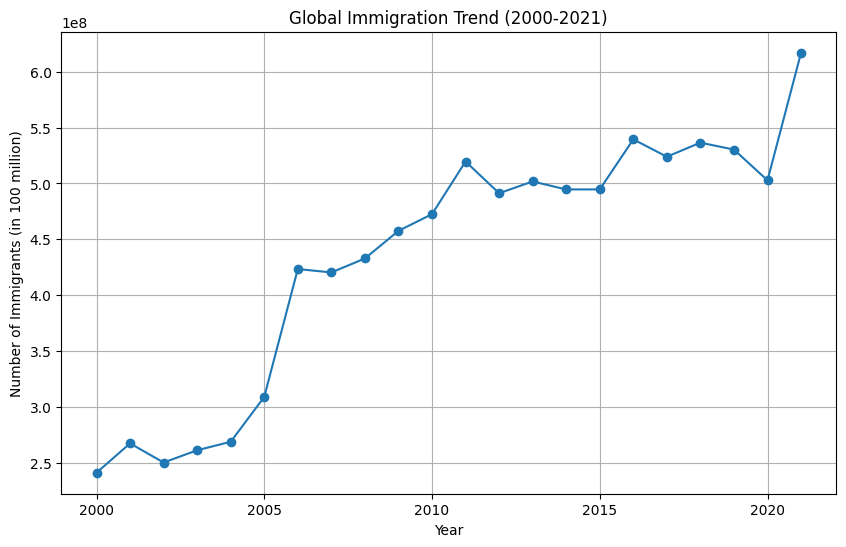

In [ ]:
if 'Year' in df.columns and 'Value' in df.columns:
    df2 = df.groupby('Year')['Value'].sum().reset_index()
    plt.figure(figsize=(10, 6))
    plt.plot(df2['Year'], df2['Value'], marker='o')
    plt.title("Global Immigration Trend (2000-2021)")
    plt.xlabel("Year")
    plt.ylabel("Number of Immigrants (in 100 million)")
    plt.grid(True)
    plt.show()
else:
    print("The dataset does not contain the expected columns 'Year' and 'Value'.")

## Key Insights



In [ ]:
years = sorted(df['Year'].unique())

for year in years:
    # Subset the dataframe for the current year
    data_year = df[df['Year'] == year]

    # Find the row with maximum and minimum 'Value'
    max_row = data_year.loc[data_year['Value'].idxmax()]
    min_row = data_year.loc[data_year['Value'].idxmin()]

    print(f"Year {year}:")
    print(f"  Highest Immigration: {max_row['Country']} with {max_row['Value']}")
    print(f"  Lowest Immigration: {min_row['Country']} with {min_row['Value']}\n")

Year 2000:
  Highest Immigration: United States with 30273271.0
  Lowest Immigration: Australia with 0.0

Year 2001:
  Highest Immigration: United States with 31548128.0
  Lowest Immigration: Netherlands with -1.0

Year 2002:
  Highest Immigration: United States with 33096150.0
  Lowest Immigration: Netherlands with -1.0

Year 2003:
  Highest Immigration: United States with 33667678.0
  Lowest Immigration: Netherlands with -1.0

Year 2004:
  Highest Immigration: United States with 34257701.0
  Lowest Immigration: Netherlands with -5.0

Year 2005:
  Highest Immigration: United States with 35769603.0
  Lowest Immigration: Netherlands with -1.0

Year 2006:
  Highest Immigration: United States with 37469387.0
  Lowest Immigration: Netherlands with -1.0

Year 2007:
  Highest Immigration: United States with 38048456.0
  Lowest Immigration: Hungary with 0.0

Year 2008:
  Highest Immigration: United States with 38016102.0
  Lowest Immigration: Netherlands with -18.0

Year 2009:
  Highest Immig

## Predictive Modeling using Linear Regression

This is a function for a linear regression model to forecast immigration numbers for a certain country, future year, and variable that indicates type of immigration.

In [ ]:
def predict_immigration_for_variable(df, country, future_year, variable="Inflows of foreign population by nationality"):
    """
    Predicts the immigration value for a given country and future year for a specified variable.

    The function:
      - Filters the DataFrame for the specified country and variable.
      - Aggregates the data by summing the 'Value' for each 'Year'.
      - Trains a linear regression model on the aggregated data.
      - Plots the historical trend with the regression line and the future prediction.

    Parameters:
      df (DataFrame): The input DataFrame containing at least the columns 'Year', 'Value', 'Country', and 'Variable'.
      country (str): The country for which to predict immigration values (e.g., 'USA').
      future_year (int): The future year for which to forecast the immigration value (e.g., 2025).
      variable (str, optional): The variable to filter by. Defaults to "Inflows of foreign population by nationality".

    Returns:
      dict: A dictionary containing the R-squared value, the prediction for the future year, and the fitted model.
    """
    # Filter for the specified country and variable
    df_filtered = df[(df['Country'] == country) & (df['Variable'] == variable)]

    if df_filtered.empty:
        print(f"No data available for {country} with variable '{variable}'.")
        return None

    # Aggregate the data by summing the 'Value' for each year
    df_agg = df_filtered.groupby('Year', as_index=False)['Value'].sum()
    df_agg = df_agg.sort_values(by='Year')

    # Prepare the predictor (Year) and target (aggregated Value) variables
    X = df_agg['Year'].values.reshape(-1, 1)
    y = df_agg['Value'].values

    # Build and train the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Evaluate the model with R-squared
    r_squared = model.score(X, y)
    print(f"Model for {country} and variable '{variable}' R-squared: {r_squared:.2f}")

    # Predict the immigration value for the future year
    prediction = model.predict(np.array([[future_year]]))[0]
    print(f"Predicted immigration for {country} in {future_year} (variable: '{variable}'): {prediction:.0f}")

    # Plot historical aggregated data, regression trend, and future prediction
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Historical Aggregated Data')
    plt.plot(X, model.predict(X), color='red', label='Trend Line')
    plt.scatter([future_year], prediction, color='green', label=f'Prediction for {future_year}', zorder=5)
    plt.title(f"Immigration Trend & Forecast for {country} ({variable})")
    plt.xlabel("Year")
    plt.ylabel("Number of Immigrants (Aggregated)")
    plt.legend()
    plt.grid(True)
    plt.show()

    return {'r_squared': r_squared, 'prediction': prediction, 'model': model}

Model for United States and variable 'Inflows of foreign population by nationality' R-squared: 0.03
Predicted immigration for United States in 2023 (variable: 'Inflows of foreign population by nationality'): 3250471


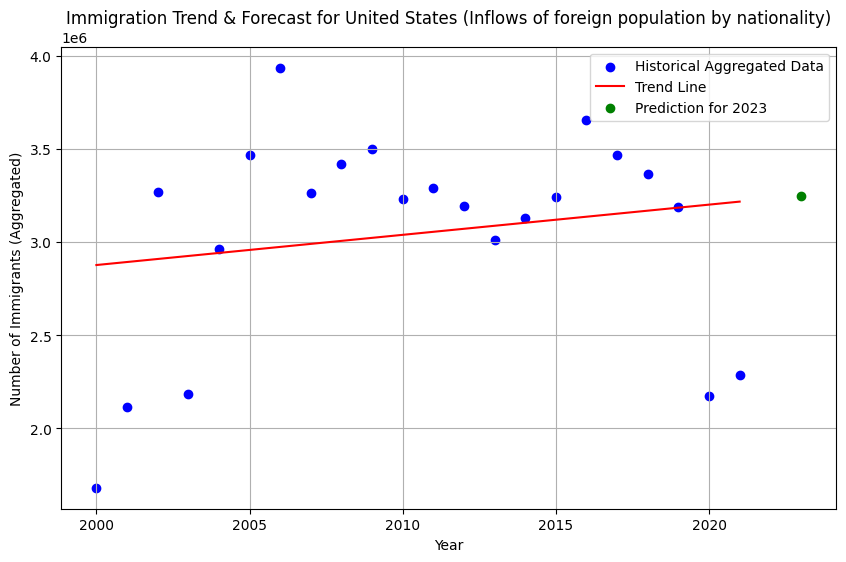

In [ ]:
results = predict_immigration_for_variable(df, 'United States', 2023)

### Summary

In this notebook, I:

- Loaded the immigration dataset from 2000 to 2021.
- Created an interactive UI for exploring the dataset and generating plots
- Visualized the global immigration trend over time.
- Built a linear regression model to forecast future immigration numbers based on the country and type of immigration (e.g., for the year 2025).


A Notebook by Varalika Varanasi